In [1]:
import pandas as pd
import codecs
import numpy as np
import math
import csv
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import openpyxl
from sklearn import svm

def create_dataset(dataset, timesteps, output_timesteps):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps):(i+timesteps+output_timesteps), :])
    return np.array(dataX), np.array(dataY)

def mae(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_true- y_pred))) 

In [2]:
PV = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/seobu_pv.csv'
pv_source = pd.read_csv(PV, encoding='CP949')
pv_source = pd.DataFrame(pv_source)
pv_source = pv_source.iloc[0:1277, :]
pv_data = np.array(pv_source)

weather_17 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2017.csv'
weather_18 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2018.csv'
weather_19 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2019.csv'
weather_20 = 'C:/Users/Smartgrid_ML/Documents/KMS/btm_data/korean_data/pv/mokpo_2020.csv'

weather_17 = pd.read_csv(weather_17, encoding='CP949')
weather_18 = pd.read_csv(weather_18, encoding='CP949')
weather_19 = pd.read_csv(weather_19, encoding='CP949')
weather_20 = pd.read_csv(weather_20, encoding='CP949')
weather = pd.concat([weather_17,weather_18,weather_19,weather_20])
weather_data = np.array(weather)

pv_data = np.nan_to_num(pv_data)
weather_data = np.nan_to_num(weather_data)
pv_dat = pv_data[:, 2:]
weather_dat = weather_data[:, 3:]
pv_dat = pv_dat.reshape(-1,1)

dataset = np.hstack([pv_dat, weather_dat])
index = ['Measured PV', 'Temperature C', 'Rainfall', 'Wind speed', 'Wind direction', 'Humidity', 'Air pressure', 'Dew point C', 'Sunshine', 'Solar radiation', 'Snowfall', 'Cloud cover', 'Surface temp C']

df = pd.DataFrame(dataset, columns=index)
df.head()
df = df.fillna(0)

In [8]:
df = np.array(df)
pv = df[:,0]
pv = pv.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
pv = scaler.fit_transform(pv)

X, Y = create_dataset(pv, 30, 1)
print(X.shape)
print(Y.shape)

#Training_set = X[0:21447]
#Test_set = X[21448:]

(30616, 30, 1)
(30616, 1, 1)


In [9]:
trX = X[:21470, :, :].reshape(-1,30)
teX = X[21470:, :, :].reshape(-1,30)
trY = Y[:21470, :, :].reshape(-1)
teY = Y[21470:, :, :].reshape(-1)
print(trX.shape)

(21470, 30)


In [10]:
clf = svm.SVR(gamma="auto")
clf.fit(trX, trY)
#for i in range(12):
#    gp.fit(X_tr[1999*i:1999*i+1998,:], Y_tr[1999*i:1999*i+1998,:])
#    print("%.1f ended" % i)

SVR(gamma='auto')

In [11]:
predictions = clf.predict(teX)
print(predictions.shape)

(9146,)


(9146,)
Test RMSE: 0.071
Test MAE: 0.056


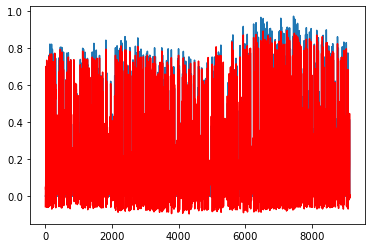

In [12]:
predictions = np.array(predictions)
print(predictions.shape)
rmse_result = root_mean_squared_error(teY, predictions)
mae_result = mae(teY, predictions)


print('Test RMSE: %.3f' % rmse_result)
print('Test MAE: %.3f' % mae_result)


plt.plot(teY)
plt.plot(predictions, color='red')
plt.show()
np.savetxt('SVM_PREDICTION.txt', predictions)